In [26]:
########################################
# Working with DATE
########################################

#first and last hurricane in the US style
two_hurricanes = ["10/7/2016", "6/21/2017"]

#########################
#Creating date objects
#########################
#1 Import date
from datetime import date
#2 Create date
two_hurricanes_dates = [date(2016,10,7), date(2017,6,21)]
#3 Access date
print(two_hurricanes_dates[0].year)
print(two_hurricanes_dates[0].month)
print(two_hurricanes_dates[0].day)
print(two_hurricanes_dates[0].weekday())


2016
10
7
4


In [27]:
############################################################################
# Exploring 67 years of Hurricane landfalls in the US state of Florida.
# List of the hurricanes that made landfall in Florida from 1950 to 2017. 
# There were 235 in total.
############################################################################
import pickle
with open('datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)   # florida_hurricane_dates is a list

#How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?
#Atlantic hurricane season officially begins on June 1

# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)



10


In [28]:
#################
#Math with DATE
#################
from datetime import date
d1 = date(2017,11,5)
d2 = date(2017,12,4)
l = [d1,d2]

print(min(l))

# Substract 2 dates generates a delta object
delta = d2 - d1 
print(delta.days)

# add a delta object to a date
#create a timedelta object
from datetime import timedelta
td = timedelta(days=29)
print(d1 + td)

2017-11-05
29
2017-12-04


In [29]:
#Counting events per calendar month

#how hurricanes in Florida were distributed across months throughout the year.
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0, 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] +=1
  
print(hurricanes_each_month)

#Putting a list of dates in order
dates_ordered = sorted(florida_hurricane_dates)
# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])


{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}
1950-08-31
2017-10-29


In [30]:
#######################################
#Printing DATES in a friendly format
#######################################
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)
print("\n")
#######################################
#Representing DATES in different ways
#######################################
# Import date
from datetime import date
# Create a date object
andrew = date(1992, 8, 26)
# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))
# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime("%B (%Y)"))
# Print the date in the format 'YYYY-DDD'
print(andrew.strftime("%Y-%j"))

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


1992-08
August (1992)
1992-239


In [90]:
######################################################
# working with DATES AND TIMES
# understand the trips that W20529 took 
# throughout the three months we're interested in.
######################################################
#We will be following one bike, ID number "W20529", 
#on all the trips it took in October, November, and December of 2017. 
#Each trip consisted of a date and time when a bike was undocked from a station, 
#then some time passed, and the date and time when W20529 was docked again.
pd.set_option("mode.chained_assignment", None)

import pandas as pd 
onebike_datetimes = pd.read_csv("datasets/capital-onebike.csv")
#display(onebike_datetimes.info())

from datetime import datetime 

# Import datetime
from datetime import datetime
# Create a datetime object by hand
dt = datetime(2017, 10, 1, 15, 26, 26)
# Print the results in ISO 8601 format
print(dt.isoformat())
print(dt.strftime("%Y-%m-%d"))

# Replace the year with 1917
dt_old = dt.replace(year=1917)
# Print the results in ISO 8601 format
print(dt_old)

#Did more trips start before noon or after noon?
#Counting events before and after noon

#create a dictionary with two entries: 
#start is a datetime object corresponding to the start of a trip (when a bike is removed from the dock) 
#and end is a datetime object corresponding to the end of a trip (when a bike is put back into a dock).
onebike = onebike_datetimes[["Start date", "End date"]]
onebike.columns = ['start', 'end']
onebike["start"] = pd.to_datetime(onebike["start"])
onebike["end"] = pd.to_datetime(onebike["end"])

myDict = onebike.to_dict('record')
print(myDict[:5])

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

# Loop over all trips
for trip in myDict:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)    

#It looks like this bike is used about twice as much after noon than it is before noon. 
#One obvious follow up would be to see _which_ hours the bike is most likely to be taken out for a ride.


2017-10-01T15:26:26
2017-10-01
1917-10-01 15:26:26
[{'start': Timestamp('2017-10-01 15:23:25'), 'end': Timestamp('2017-10-01 15:26:26')}, {'start': Timestamp('2017-10-01 15:42:57'), 'end': Timestamp('2017-10-01 17:49:59')}, {'start': Timestamp('2017-10-02 06:37:10'), 'end': Timestamp('2017-10-02 06:42:53')}, {'start': Timestamp('2017-10-02 08:56:45'), 'end': Timestamp('2017-10-02 09:18:03')}, {'start': Timestamp('2017-10-02 18:23:48'), 'end': Timestamp('2017-10-02 18:45:05')}]
{'AM': 94, 'PM': 196}


In [98]:
#####################################
#Turning strings into DATETIMES
#parse dates in most common formats
#####################################
# downloaded data from the Internet, dates and times usually come as strings. 
# the first step is to turn those strings into datetime objects.

# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'
# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'
# Create a datetime object d
d = datetime.strptime(s, fmt)
# Print d
print(d)

# Starting string, in YYYY-MM-DD format
s = '2030-10-15'
# Write a format string to parse s
fmt = '%Y-%m-%d'
# Create a datetime object d
d = datetime.strptime(s, fmt)
# Print d
print(d)

#####################################
#Parsing pairs of strings as datetimes
#####################################
onebike_datetimes = pd.read_csv("datasets/capital-onebike.csv")
onebike_datetime_strings = list(zip(onebike_datetimes["Start date"], onebike_datetimes["End date"]))
print(onebike_datetime_strings[:5])

# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)
print(onebike_datetimes[:5])    

#many complex data cleaning tasks follow this same format: 
#start with a list, process each element, and add the processed data to a new list.

#####################################
#Recreating ISO format with strftime()
#####################################
# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))    

#########################################
#Unix timestamps
#number of seconds since January 1, 1970
#########################################
# Import datetime
from datetime import datetime
# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []
# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

2017-02-03 00:00:01
2030-10-15 00:00:00
[('2017-10-01 15:23:25', '2017-10-01 15:26:26'), ('2017-10-01 15:42:57', '2017-10-01 17:49:59'), ('2017-10-02 06:37:10', '2017-10-02 06:42:53'), ('2017-10-02 08:56:45', '2017-10-02 09:18:03'), ('2017-10-02 18:23:48', '2017-10-02 18:45:05')]
[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26)}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59)}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53)}, {'start': datetime.datetime(2017, 10, 2, 8, 56, 45), 'end': datetime.datetime(2017, 10, 2, 9, 18, 3)}, {'start': datetime.datetime(2017, 10, 2, 18, 23, 48), 'end': datetime.datetime(2017, 10, 2, 18, 45, 5)}]
2017-10-01T15:23:25
2017-10-01T15:23:25
[datetime.datetime(2017, 12, 30, 15, 19, 13), datetime.datetime(2017, 12, 30, 15, 9, 3)]


In [100]:
#############################
#timedelta with DATETIME
#############################
#Turning pairs of datetimes into durations
#calculate the number of seconds that the bike was out of the dock for each trip.
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip["end"] - trip["start"]
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)
    
print(onebike_durations)


[181.0, 7622.0, 343.0, 1278.0, 1277.0, 1366.0, 815.0, 545.0, 491.0, 639.0, 1678.0, 406.0, 709.0, 514.0, 492.0, 1668.0, 2242.0, 2752.0, 735.0, 330.0, 518.0, 1433.0, 204.0, 304.0, 977.0, 1399.0, 1244.0, 658.0, 800.0, 1911.0, 2471.0, 1344.0, 435.0, 271.0, 920.0, 851.0, 209.0, 453.0, 841.0, 142.0, 1023.0, 1466.0, 1636.0, 3039.0, 1571.0, 1410.0, 386.0, 1527.0, 622.0, 1450.0, 1422.0, 991.0, 1484.0, 1450.0, 929.0, 533.0, 525.0, 283.0, 133.0, 1106.0, 952.0, 553.0, 659.0, 297.0, 357.0, 989.0, 979.0, 760.0, 1110.0, 675.0, 1207.0, 1593.0, 768.0, 1446.0, 485.0, 200.0, 399.0, 242.0, 170.0, 450.0, 1078.0, 1042.0, 573.0, 748.0, 735.0, 336.0, 76913.0, 171.0, 568.0, 358.0, 917.0, 671.0, 1791.0, 318.0, 888.0, 1284.0, 11338.0, 1686.0, 5579.0, 8290.0, 1850.0, 1810.0, 870.0, 436.0, 429.0, 494.0, 1439.0, 380.0, 629.0, 962.0, 387.0, 952.0, 190.0, 739.0, 1120.0, 369.0, 2275.0, 873.0, 1670.0, 643.0, 572.0, 1375.0, 725.0, 688.0, 1041.0, 1707.0, 1236.0, 1291.0, 2890.0, -3346.0, 1213.0, 331.0, 1497.0, 527.0, 584.

In [102]:
#############################
#Average trip time
#############################
#W20529 took 291 trips in our data set. How long were the trips on average? 
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)


#Out of 291 trips taken by W20529, how long was the longest? 
#How short was the shortest? Does anything look fishy?
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

#Weird. For at least one trip, the bike returned before it left. 
#Why could that be? 
#it happened in early November, around 2AM local time. What happens to clocks around that time each year?


1178.9310344827586
The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


In [122]:
##############
#UTC offsets
##############
from datetime import datetime, timedelta, timezone
#US Eastern Standard time zone is UTC-5
ET = timezone(timedelta(hours=-5))
dt = datetime(2017,12,30,15,9,5, tzinfo = ET)

#convert to India Standard time zone
IST = timezone(timedelta(hours=5, minutes=30))
print(dt.astimezone(IST))

print(dt.replace(tzinfo = timezone.utc))
print(dt.astimezone(timezone.utc))


# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)
# Print results
print(dt.isoformat())


# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))
# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)
# Print results
print(dt.isoformat())




2017-12-31 01:39:05+05:30
2017-12-30 15:09:05+00:00
2017-12-30 20:09:05+00:00
2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00


In [124]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)
  print('Trip start updated:', trip['start'],'Trip end updated:', trip['end'])

#What time did the bike leave in UTC?
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())


Trip start updated: 2017-10-01 15:23:25-04:00 Trip end updated: 2017-10-01 15:26:26-04:00
Trip start updated: 2017-10-01 15:42:57-04:00 Trip end updated: 2017-10-01 17:49:59-04:00
Trip start updated: 2017-10-02 06:37:10-04:00 Trip end updated: 2017-10-02 06:42:53-04:00
Trip start updated: 2017-10-02 08:56:45-04:00 Trip end updated: 2017-10-02 09:18:03-04:00
Trip start updated: 2017-10-02 18:23:48-04:00 Trip end updated: 2017-10-02 18:45:05-04:00
Trip start updated: 2017-10-02 18:48:08-04:00 Trip end updated: 2017-10-02 19:10:54-04:00
Trip start updated: 2017-10-02 19:18:10-04:00 Trip end updated: 2017-10-02 19:31:45-04:00
Trip start updated: 2017-10-02 19:37:32-04:00 Trip end updated: 2017-10-02 19:46:37-04:00
Trip start updated: 2017-10-03 08:24:16-04:00 Trip end updated: 2017-10-03 08:32:27-04:00
Trip start updated: 2017-10-03 18:17:07-04:00 Trip end updated: 2017-10-03 18:27:46-04:00
Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-0

In [128]:
#Putting the bike trips into the right time zone
#Instead of setting the timezones for W20529 by hand, 
#let's assign them to their IANA timezone: 'America/New_York'. 
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)
  print('Trip start:', trip['start'],'Trip end:', trip['end'])

#What time did the bike leave? 
#moving things from 'America/New_York' into a few different time zones.
# Create the timezone object
uk = tz.gettz("Europe/London")

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']
# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())


Trip start: 2017-10-01 15:23:25-04:00 Trip end: 2017-10-01 15:26:26-04:00
Trip start: 2017-10-01 15:42:57-04:00 Trip end: 2017-10-01 17:49:59-04:00
Trip start: 2017-10-02 06:37:10-04:00 Trip end: 2017-10-02 06:42:53-04:00
Trip start: 2017-10-02 08:56:45-04:00 Trip end: 2017-10-02 09:18:03-04:00
Trip start: 2017-10-02 18:23:48-04:00 Trip end: 2017-10-02 18:45:05-04:00
Trip start: 2017-10-02 18:48:08-04:00 Trip end: 2017-10-02 19:10:54-04:00
Trip start: 2017-10-02 19:18:10-04:00 Trip end: 2017-10-02 19:31:45-04:00
Trip start: 2017-10-02 19:37:32-04:00 Trip end: 2017-10-02 19:46:37-04:00
Trip start: 2017-10-03 08:24:16-04:00 Trip end: 2017-10-03 08:32:27-04:00
Trip start: 2017-10-03 18:17:07-04:00 Trip end: 2017-10-03 18:27:46-04:00
2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [129]:
########################
#Daylight
########################

#datetime object without timezone information
spring_ahead_159am = datetime(2017,3,12,1,59,59)
print(spring_ahead_159am.isoformat())

spring_ahead_3am = datetime(2017,3,12,1,59,59)
print(spring_ahead_3am.isoformat())

(spring_ahead_3am-spring_ahead_159am).total_seconds()

EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_159am.isoformat()
spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EST)
spring_ahead_3am.isoformat()

(spring_ahead_3am-spring_ahead_159am).seconds

#But how do we know when the cutoff is without looking it up ourselves? 
#dateutil saves us from having to know daylight savings rules
#like before when it saved us from having to define timezones by hand
#import tz
from dateutil import tz
#create eastern timezone
eastern = tz.gettz('America/New_york')
spring_ahead_159am = datetime(2017,3,12,1,59,59,tzinfo=eastern)
spring_ahead_3am = datetime(2017,3,12,1,59,59,tzinfo=eastern)



2017-03-12T01:59:59
2017-03-12T01:59:59


In [132]:
#How many hours elapsed around daylight saving?
#Since our bike data takes place in the fall, 
#you have to think about the start of daylight savings time.
#look at March 12, 2017, in the Eastern United States, when Daylight Saving kicked in at 2 AM.

#If you create a datetime for midnight that night, and add 6 hours to it, how much time will have elapsed?
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))
#You added 6 hours, and got 6 AM, despite the fact that the clocks springing forward 
#means only 5 hours would have actually elapsed.

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

#When we compare times in local time zones, everything gets converted into clock time. 
#to get absolute time differences, always move to UTC


2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [144]:
#################################
#March 29, throughout a decade
#################################

# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo=tz.gettz("Europe/London"))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())



2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [149]:
############
#Fall back
############
# Loop over trips
for trip in onebike_datetimes:
  trip['start'] = trip['start'].astimezone(tz.gettz('America/New_York'))
  trip['end'] = trip['end'].astimezone(tz.gettz('America/New_York'))
  
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

#Cleaning daylight saving data with fold    
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

#When collecting data, store it in UTC or with a fixed UTC offset


Ambiguous start at 2017-11-05 01:56:50-04:00
Ambiguous end at 2017-11-05 01:01:04-05:00
Shortest trip: 116.0


In [266]:
#################
#All together
#################
import pandas as pd
rides = pd.read_csv("datasets/capital-onebike.csv")
display(rides.head(3))
print(rides["Start date"])
print(rides.iloc[2])
#start time, End time are not datetime object just string or object
print('\n')
#We want Pandas to treat this columns as datetime
rides = pd.read_csv("datasets/capital-onebike.csv", parse_dates=['Start date', 'End date'] )
display(rides["Start date"].iloc[2])
#or later with: rides['Start date'] = pd.to_datetime(rides["Start date"], format = "%Y-%m-%d %H:%M:%S")

#substracting two datetimes gives a timedelta object
rides["Duration"] = rides["End date"] - rides["Start date"]
display(rides["Duration"])

#convert timedelat in second
display(rides["Duration"].dt.total_seconds().head(5))



,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


0      2017-10-01 15:23:25
1      2017-10-01 15:42:57
2      2017-10-02 06:37:10
3      2017-10-02 08:56:45
4      2017-10-02 18:23:48
              ...         
285    2017-12-29 14:32:55
286    2017-12-29 15:08:26
287    2017-12-29 20:33:34
288    2017-12-30 13:51:03
289    2017-12-30 15:09:03
Name: Start date, Length: 290, dtype: object
Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object




Timestamp('2017-10-02 06:37:10')

0     0 days 00:03:01
1     0 days 02:07:02
2     0 days 00:05:43
3     0 days 00:21:18
4     0 days 00:21:17
            ...      
285   0 days 00:10:51
286   0 days 00:10:25
287   0 days 00:04:39
288   0 days 00:03:30
289   0 days 00:10:10
Name: Duration, Length: 290, dtype: timedelta64[ns]

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

Timedelta('0 days 00:19:38.931034482')

Timedelta('3 days 22:58:10')

0.04348417785917786

0       181.0
1      7622.0
2       343.0
3      1278.0
4      1277.0
        ...  
285     651.0
286     625.0
287     279.0
288     210.0
289     610.0
Name: Duration seconds, Length: 290, dtype: float64

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

Member type
Casual     54
Member    236
dtype: int64

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


<Axes: xlabel='Start date'>

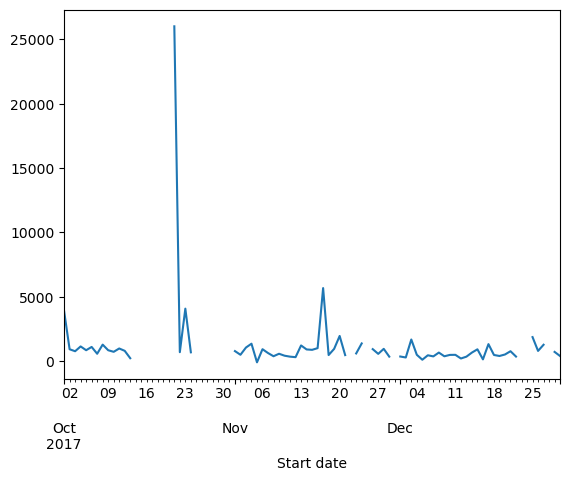

In [267]:
#########################################
#summarizing datetime data in Pandas
#########################################
display(rides["Duration"].mean())
display(rides["Duration"].sum())

display(rides["Duration"].sum() / timedelta(days=91))

rides["Member type"].value_counts() / len(rides)
#81% of rides where from members

#add duration in seconds
rides["Duration seconds"] = rides["Duration"].dt.total_seconds()
display(rides["Duration seconds"] )

display(rides.groupby("Member type")["Duration seconds"].mean())

#groupbby time with a unit of time here M for month
display(rides.resample('M', on="Start date")["Duration seconds"].mean())

display(rides.groupby("Member type").size())
display(rides.groupby("Member type").first())

#visualize
rides.resample('d', on="Start date")["Duration seconds"].mean().plot()
# pick in October possibly a bike repair


bool
6 rides were joyrides
The median duration overall was  660  seconds
The median duration for joyrides was  2642.5  seconds


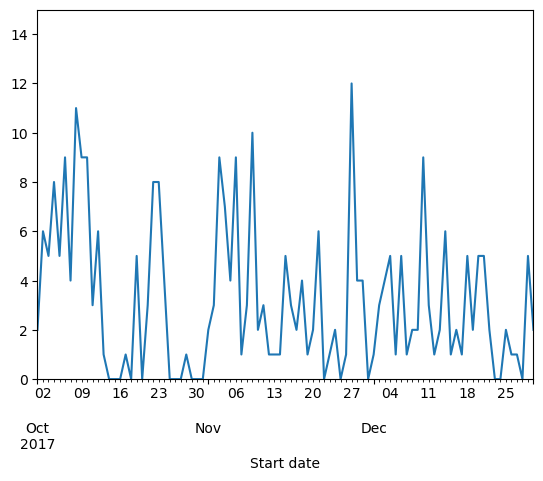

In [268]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])
print(joyrides.dtype)

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was ", rides['Duration'].median().seconds, " seconds")

# Median of joyrides
print("The median duration for joyrides was ", rides[joyrides]['Duration seconds'].median(), " seconds")


# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
import matplotlib.pyplot as plt
plt.show()



In [269]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on="Start date")['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

#Combining groupby() and resample()
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration seconds'].median())
#casual riders consistently took longer rides, 
#but that both groups took shorter rides as the months went by.


Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64
Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration seconds, dtype: float64


In [270]:
#timezones in Pandas
rides["Duration"].dt.total_seconds().min()

#something wrong because of Daylight saving
display(rides['Start date'].head(3))
#these datetime object are timezone naive
#there's no UTC offset

#put a timezone on a datetime object
display(rides['Start date'].head(3).dt.tz_localize('America/New_York'))

#rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York') 
#AmbiguousTimeError because one datetime occurs during the Daylight Saving shift



0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

In [271]:
#Handle ambiguous datetimes
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

#re-calculate duration with timezone
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration'].dt.total_seconds().min()

116.0

In [272]:
#look at problematic row : NaT values
display(rides.iloc[129])

#Other datetime operations in Pandas
display(rides["Start date"].head(3).dt.month)
display(rides["Start date"].head(3).dt.day_name())

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Duration seconds              -3346.0
Name: 129, dtype: object

0    10
1    10
2    10
Name: Start date, dtype: int64

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

In [273]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()
rides['Duration'] = rides['Duration'].dt.total_seconds()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

2017-10-01 20:23:25+01:00
Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


In [277]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on="Start date")

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64
